In [24]:
import pandas as pd

df_o = pd.read_csv('data_o.csv')

In [26]:
print(df_o.shape)
df_o.head()

(170653, 19)


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [27]:
df_o = df_o.drop(['artists', 'name', 'release_date'], axis=1)

df_o = df_o.dropna()

df_o.shape

# Visualizations

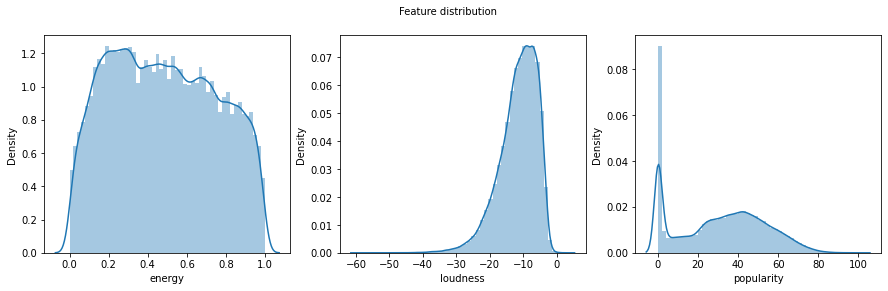

In [30]:
import seaborn as sns 

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

features_o = ['energy','loudness','popularity']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(df_o['energy'])

plt.subplot(1, 3, 2)
sns.distplot(df_o['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(df_o['popularity'])


plt.suptitle('Feature distribution ', fontsize = 10)
plt.show()

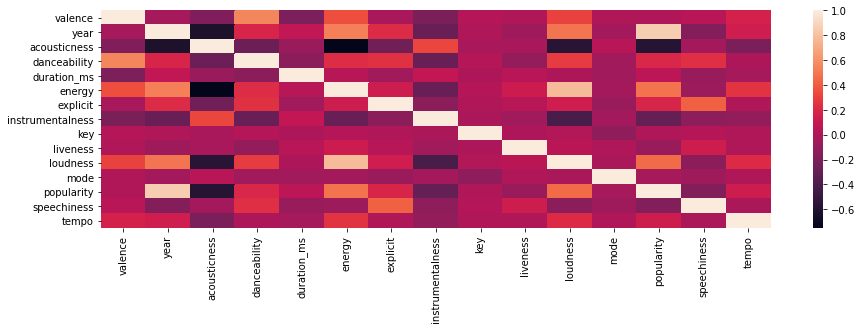

In [31]:
cor = df_o.corr()
sns.heatmap(cor)

# Building the model

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

import joblib

In [33]:
df_id = df_o['id']
df_features = df_o[df_o.columns.drop('id')]

scalable_features = ['duration_ms', 'popularity', 'tempo', 'key','loudness']
scaling_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
knn = NearestNeighbors(n_neighbors=10, algorithm= 'ball_tree', radius=1.0)



column_trans = ColumnTransformer(
    transformers=[
         ('scaled', scaling_transformer, scalable_features)],
         remainder='passthrough'
)

transformed_features = column_trans.fit_transform(df_features)
transformed_features.shape

In [36]:
df_o.isna().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
dtype: int64

In [37]:
knn.fit(transformed_features)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [38]:
neighbors = knn.kneighbors(transformed_features[39000].reshape(1,-1), 
                           return_distance=False)[0][1:]

neighbors

In [40]:
for n in neighbors:
  print(df_id[n])

2BJvcoR0zdlTet5vQeTIoG
3IYSB7QLWYhpi2gjBNACvE
5Zj20q5l1doNGH24AUpqcV
4HwIubkyAlBdNny3kRQAaa
2ze0gHQll2OhQ7ojhfcmYg
0eMHhpdrVKwQmekyBxX7he
2vm1vcN9KacwojwTGOg1lm
2NAjEPj7jEEKV3Kcu4EYWY
20FJ0GMxWGwdNSnBx8oZei


In [45]:
df = pd.read_csv('data_o.csv')
df_new = df.query("id== '2BJvcoR0zdlTet5vQeTIoG'")

df_new

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
39000,0.0691,1928,0.992,"['Frédéric Chopin', 'Vladimir Horowitz']",0.244,328267,0.00793,0,2BJvcoR0zdlTet5vQeTIoG,0.934,1,0.0878,-32.492,0,"Étude in C-Sharp Minor, Op. 25, No. 7",0,1928,0.034,93.048


In [46]:
returned_songs = [df.iloc[n] for n in neighbors]
returned_songs[0]

In [48]:
returned_songs[0]['name']

'Étude in C-Sharp Minor, Op. 25, No. 7'

In [50]:
for song in returned_songs:
  print(song[14])

Étude in C-Sharp Minor, Op. 25, No. 7
Étude in C-Sharp Minor, Op. 25, No. 7
Étude in C-Sharp Minor, Op. 25, No. 7
Sonata, Op. 14, No. 3 in F Minor: II. Largo e sostenuto
Sonata, Op. 14, No. 3 in F Minor: II. Largo e sostenuto
Fantasiestücke, Op. 111: Con forza, assai marcato
Fantasiestücke, Op. 111: Con forza, assai marcato
Chopin: Nocturne No. 18 in E Major, Op. 62 No. 2
Mazurka in C-Sharp Minor, Op. 30, No. 4


In [51]:
df_pred = df.query("name== 'Uprising'")
df_pred

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
17458,0.411,2009,0.000202,['Muse'],0.602,304840,0.905,0,4VqPOruhp5EdPBeR92t6lQ,0.064000,2,0.117,-4.046,1,Uprising,76,2009-09-10,0.0775,128.019
138913,0.428,2010,0.009910,['Sabaton'],0.527,295640,0.866,0,0cajnv3diwVnb2KXv7hLVs,0.000052,6,0.129,-3.763,0,Uprising,55,2010-05-21,0.0346,87.986


In [52]:
neighbors_uprising = knn.kneighbors(transformed_features[17458].reshape(1,-1), return_distance=False)[0][1:]

In [53]:
for n in neighbors_uprising:
  print(df_id[n])

1NhPKVLsHhFUHIOZ32QnS2
5RoIXwyTCdyUjpMMkk4uPd
58dRbjabfppvKsQlV0timz
2hUFjIbpKaRqs97OjUAmXb
6NUh68V6ikd96sTiUCH6ID
0vz64VTiPPBpcmla0QvAI9
0fZq7eIpfg7GHi9UOeRaaB
4DyKZmONpoggnn3piyjad2
3lJwIAfeWtnNRbJXWbIHKD


In [54]:
returned_songs_uprising = [df.iloc[n] for n in neighbors_uprising]

for song in returned_songs_uprising:
  print(song[8], song[14], song[3])

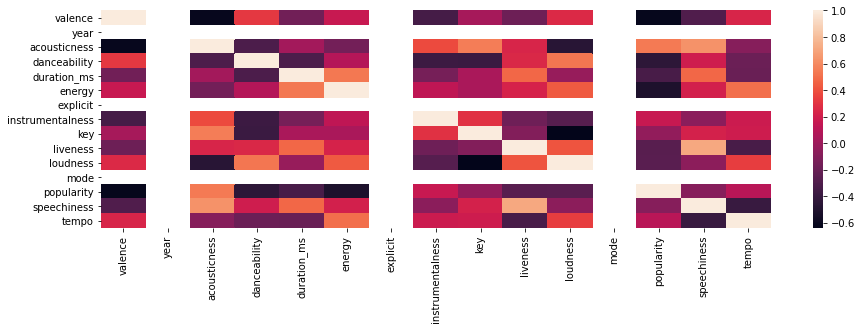

In [74]:
cor_songs_uprising = pd.DataFrame(returned_songs_uprising)

cor = cor_songs_uprising.corr()
sns.heatmap(cor)

# Save and serialize the model

In [57]:
joblib.dump(knn, 'knnbaseline.joblib.gz', compress=('gzip', 3))

['knnbaseline.joblib.gz']

In [63]:
model = joblib.load('knnbaseline.joblib.gz')

# Autoencoder and K-NN

In [78]:
!pip install keras-tuner

     |████████████████████████████████| 102kB 10.3MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=97b4bf0c2f1cddd17f7268a05091bb479a4b814ae768193ec8e80f7ba344f63d
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [79]:
%load_ext tensorboard
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from kerastuner.tuners import RandomSearch


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [65]:
input_df = Input( shape = (15, ))

x = Dense(7, activation = 'relu')(input_df)
x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(256, activation = 'relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(15, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(256, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(15, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam',
                    loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(transformed_features, 
                transformed_features, 
                batch_size= 50, 
                epochs = 25, 
                verbose = 1)

# Random Search Model 
### (couldn't get it working)

In [81]:
def spotify_model(hp):
    model = joblib.load('knnbaseline.joblib.gz')
  
    input_df = Input( shape = (15, ))
  
    x = Dense(7, activation = 'relu')(input_df)
    x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(256, activation = 'relu', kernel_initializer='glorot_uniform')(x)

    encoded = Dense(15, activation = 'relu', 
                    kernel_initializer='glorot_uniform')(x)

    x = Dense(256, activation = 'relu', 
              kernel_initializer='glorot_uniform')(encoded)
    x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)

    decoded = Dense(15, kernel_initializer='glorot_uniform')(x)
    autoencoder = Model(input_df, decoded)
    encoder = Model(input_df, encoded)

    autoencoder.compile(optimizer
                        =keras.optimizers.Adam(
                            hp.Choice('learning_rate',
                                      values=[1e-2, 1e-3, 1e-4])),
                        loss = 'mean_squared_error')
    return model

In [82]:
tuner = RandomSearch(
    spotify_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='./keras-tuner-spotify',
    project_name='SpotifySleuth')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-81-7fcd0f80d563>", line 23, in spotify_model
    =keras.optimizers.Adam(
NameError: name 'keras' is not defined


Invalid model 0/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-81-7fcd0f80d563>", line 23, in spotify_model
    =keras.optimizers.Adam(
NameError: name 'keras' is not defined


Invalid model 1/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-81-7fcd0f80d563>", line 23, in spotify_model
    =keras.optimizers.Adam(
NameError: name 'keras' is not defined


Invalid model 2/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-81-7fcd0f80d563>", line 23, in spotify_model
    =keras.optimizers.Adam(
NameError: name 'keras' is not defined


Invalid model 3/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-81-7fcd0f80d563>", line 23, in spotify_model
    =keras.optimizers.Adam(
NameError: name 'keras' is not defined


Invalid model 4/5
Invalid model 5/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-81-7fcd0f80d563>", line 23, in spotify_model
    =keras.optimizers.Adam(
NameError: name 'keras' is not defined


RuntimeError: ignored

# Clustering

In [83]:
pred = autoencoder.predict(transformed_features)
Knn_model = NearestNeighbors(n_neighbors=10)
Knn_model.fit(pred)

In [89]:
pred_song = autoencoder.predict(transformed_features[15373].reshape(1,-1))
pred_song.shape

In [91]:
neighbors

array([39000, 57657, 75595, 57791, 57616, 20375, 39113,  1305, 38976])

In [92]:
transformed_features[0].shape

(15,)

In [93]:
neighbors_auto = Knn_model.kneighbors(pred_song.reshape(1,-1), return_distance=False)[0][1:]
neighbors_auto

In [95]:
for n in neighbors_auto:
  print(df_id[n])

6VQm5LHlP9nIsEYOcGB7V1
2huEOPsK2M0GbgfoiTqEdy
2GtgLDMkFr4QL6ZU8uretH
0UjtkXe54YuY5SMwXYjkvq
5AMrnF761nziCWUfjBgRUI
4Qh45lpxEv6NMp2GwBEIO6
4ZCaO5I6XdIHb0X2UwNDtZ
0q90594hk25yo0xZmBTqCd
7JAg3hNqZVTE4vCVPl6cFu


# Save weights

In [96]:
autoencoder.save_weights("modelstacked2.h5")

joblib.dump(Knn_model, 
            'autoencoded_knn.joblib.gz',
            compress=('gzip', 3))

In [99]:
model1 = joblib.load('autoencoded_knn.joblib.gz')

In [102]:
autoencoder.history

In [103]:
uprising_pred = autoencoder.predict(transformed_features[15373].reshape(1,-1))

uprising_autoknn_pred = Knn_model.kneighbors(uprising_pred.reshape(1,-1),
                                             return_distance=False)[0][1:]

In [107]:
uprising_autoknn_pred

array([166176, 104375,  70653,  34255,  15373, 166163,  70758,  34207,
        87830])

In [108]:
for n in uprising_autoknn_pred:
  print(df_id[n])

6VQm5LHlP9nIsEYOcGB7V1
2huEOPsK2M0GbgfoiTqEdy
2GtgLDMkFr4QL6ZU8uretH
0UjtkXe54YuY5SMwXYjkvq
5AMrnF761nziCWUfjBgRUI
4Qh45lpxEv6NMp2GwBEIO6
4ZCaO5I6XdIHb0X2UwNDtZ
0q90594hk25yo0xZmBTqCd
7JAg3hNqZVTE4vCVPl6cFu


In [109]:
returned_songs_uprising_auto = [df.iloc[n] for n in uprising_autoknn_pred]

for song in returned_songs_uprising_auto:
  print(song[8], song[14], song[3])

6VQm5LHlP9nIsEYOcGB7V1 Never There ['Cake']
2huEOPsK2M0GbgfoiTqEdy Last Caress / Green Hell ['Metallica']
2GtgLDMkFr4QL6ZU8uretH All About U ['2Pac', 'Snoop Dogg', 'Nate Dogg', 'Dru Down']
0UjtkXe54YuY5SMwXYjkvq Nunca Te Olvidaré ['Enrique Iglesias']
5AMrnF761nziCWUfjBgRUI Waltz #2 (XO) ['Elliott Smith']
4Qh45lpxEv6NMp2GwBEIO6 Freakin' ['T-Dre', 'Delux', 'Cali Life Style']
4ZCaO5I6XdIHb0X2UwNDtZ Kissing a Fool ['George Michael']
0q90594hk25yo0xZmBTqCd Don't Let the Sun Go Down on Me ['George Michael', 'Elton John']
7JAg3hNqZVTE4vCVPl6cFu Jump Right In ['The Urge']
